<a href="https://colab.research.google.com/github/hemu1808/Random-files/blob/main/image2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [ ]:
# Set up directories
train_dir = '/content/drive/MyDrive/cars/Train'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

#data augmentation

datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 52 images belonging to 3 classes.
Found 12 images belonging to 3 classes.


In [ ]:
#model arch
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Assuming 3 classes
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#train model
history = model.fit(
    train_data,
    epochs=30,
    validation_data=val_data
)

Epoch 1/30
2/2 [==============================] - 1s 459ms/step - loss: 0.9847 - accuracy: 0.5000 - val_loss: 0.9640 - val_accuracy: 0.6667
Epoch 2/30
2/2 [==============================] - 1s 294ms/step - loss: 0.9581 - accuracy: 0.5577 - val_loss: 0.9217 - val_accuracy: 0.6667
Epoch 3/30
2/2 [==============================] - 1s 401ms/step - loss: 1.0085 - accuracy: 0.5192 - val_loss: 0.9208 - val_accuracy: 0.7500
Epoch 4/30
2/2 [==============================] - 1s 321ms/step - loss: 1.0265 - accuracy: 0.4038 - val_loss: 0.9658 - val_accuracy: 0.5000
Epoch 5/30
2/2 [==============================] - 1s 395ms/step - loss: 0.9914 - accuracy: 0.4423 - val_loss: 0.9610 - val_accuracy: 0.3333
Epoch 6/30
2/2 [==============================] - 1s 295ms/step - loss: 0.9338 - accuracy: 0.5000 - val_loss: 0.9037 - val_accuracy: 0.5000
Epoch 7/30
2/2 [==============================] - 1s 310ms/step - loss: 0.9667 - accuracy: 0.5192 - val_loss: 0.9017 - val_accuracy: 0.6667
Epoch 8/30
2/2 [====

1/1 [==============================] - 0s 139ms/step - loss: 0.9076 - accuracy: 0.3333
Validation accuracy: 0.33


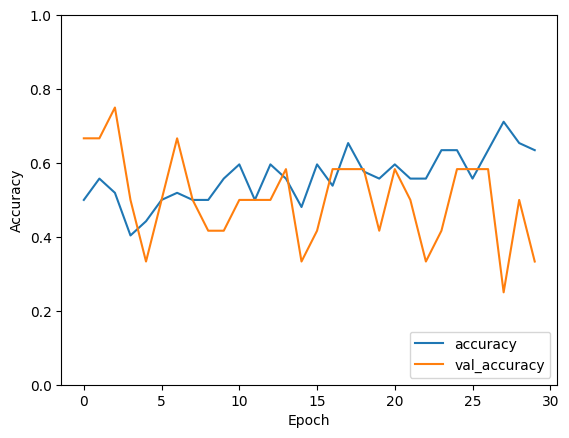

In [ ]:
val_loss, val_acc = model.evaluate(val_data)
print(f'Validation accuracy: {val_acc:.2f}')

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
import os
import shutil
from tensorflow.keras.preprocessing import image

# Load your trained model
model = load_model('car_brand_classifier.h5')

# Create directories for classified images
output_dirs = ['classified_images/audi', 'classified_images/lamborghini', 'classified_images/mercedes']

for directory in output_dirs:
    if not os.path.exists(directory):
        os.makedirs(directory)

# Function to classify and move images
def classify_and_move_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)

    if predicted_class == 0:
        target_dir = 'classified_images/audi'
    elif predicted_class == 1:
        target_dir = 'classified_images/lamborghini'
    else:
        target_dir = 'classified_images/mercedes'

    shutil.move(img_path, os.path.join(target_dir, os.path.basename(img_path)))
    print(f'Moved {img_path} to {target_dir}')

# Upload test images
uploaded = files.upload()

# Classify and move each uploaded image
for img_path in uploaded.keys():
    classify_and_move_image(img_path)

Saving 25.jpg to 25.jpg
1/1 [==============================] - 0s 72ms/step
Moved 25.jpg to classified_images/audi


In [ ]:
val_loss, val_acc = model.evaluate(val_data)
print(f'Validation accuracy: {val_acc:.2f}')

1/1 [==============================] - 0s 192ms/step - loss: 0.9991 - accuracy: 0.5000
Validation accuracy: 0.50


In [ ]:
model.save('car_brand_classifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = tf.keras.models.load_model('car_brand_classifier.h5')

In [ ]:
from tensorflow.keras.preprocessing import image

img_path = '/content/drive/MyDrive/cars/Test/audi/27.jpg'
# img_path = '/content/drive/MyDrive/cars/Test/bmw/1
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)
print(f'Predicted class: {predicted_class}')

1/1 [==============================] - 0s 323ms/step
Predicted class: 1


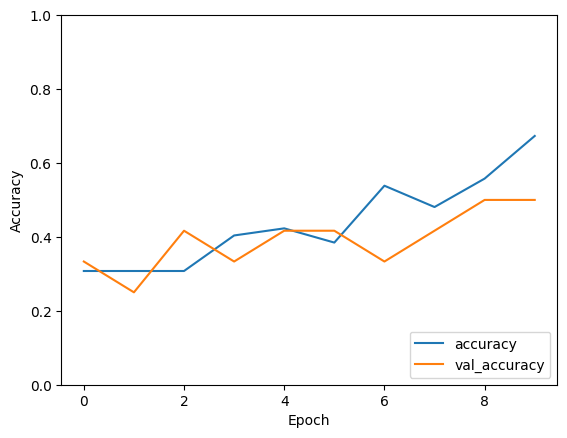

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
import os
import shutil
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from google.colab import files

# Load your trained model
model = load_model('car_brand_classifier.h5')

# Create directories for classified images
output_dirs = ['classified_images/audi', 'classified_images/lamborghini', 'classified_images/mercedes']

for directory in output_dirs:
    if not os.path.exists(directory):
        os.makedirs(directory)

# Define a function to classify images and move them to their respective directories
def classify_and_move_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)

    if predicted_class == 0:
        target_dir = 'classified_images/audi'
    elif predicted_class == 1:
        target_dir = 'classified_images/lamborghini'
    else:
        target_dir = 'classified_images/mercedes'

    shutil.move(img_path, os.path.join(target_dir, os.path.basename(img_path)))
    print(f'Moved {img_path} to {target_dir}')

# Upload test images
uploaded = files.upload()

# Classify and move each uploaded image
for img_path in uploaded.keys():
    classify_and_move_image(img_path)

Saving pexels-vlad-alexandru-popa-1402787.jpg to pexels-vlad-alexandru-popa-1402787.jpg
1/1 [==============================] - 0s 66ms/step
Moved pexels-vlad-alexandru-popa-1402787.jpg to classified_images/lamborghini
